In [1]:
import matplotlib.pyplot as plt
import numpy as np
import OOPAO




     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [2]:
import tomoAO
tomoAO.__version__

'0.0.3'

In [3]:
ao_mode = "MLAO"

config_dir = "/home/joaomonteiro/Desktop/OOPAO_ast/tutorials/"
config_file = "config.ini"

# Loading the config
config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)

In [4]:
from scipy.io import savemat, loadmat

savemat(f'/home/joaomonteiro/Desktop/OOPAO_ast/tutorials/Params.mat', config_vars)
params_path = f'/home/joaomonteiro/Desktop/OOPAO_ast/tutorials/Params.mat'
with open(f'/home/joaomonteiro/Desktop/oomao/spaceODT_reconstruction_files/params_files/TestName.txt', "w") as file:
    file.write(params_path)

In [5]:
from OOPAO.Source import Source
from OOPAO.Asterism import Asterism

optBand = config_vars["lgs_opticalBand"]
magnitude = config_vars["lgs_magnitude"]
lgs_zenith = config_vars["lgs_zenith"]
lgs_azimuth = config_vars["lgs_azimuth"]
lgs_altitude = config_vars["lgs_altitude"]

n_lgs = config_vars["n_lgs"]

lgsAst = Asterism([Source(optBand=optBand,
              magnitude=magnitude,
              coordinates=[lgs_zenith[kLgs], lgs_azimuth[kLgs]],
            altitude=lgs_altitude)
          for kLgs in range(n_lgs)])



------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  90.00  
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,90]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              | 180.00  
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       |


------------ Telescope -------------
Diameter [m]             |   8.00   
Resolution [px]          |   160    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    10    
Pixels in pupil          |  19900   
Field of view [arcsec]   |  30.00   
------------------------------------



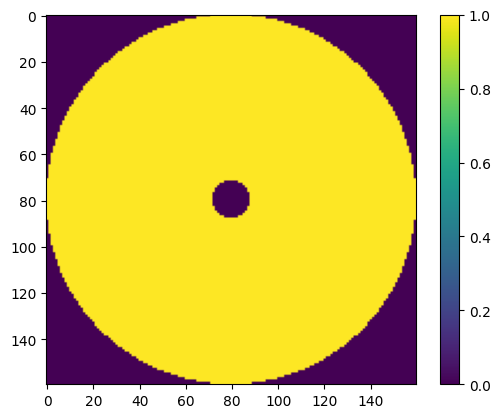

In [6]:
from OOPAO.Telescope import Telescope

from importlib import reload
reload(OOPAO.Telescope)
from OOPAO.Telescope import Telescope


sensing_wavelength = lgsAst.src[0].wavelength      # sensing wavelength of the WFS, read from the ngs object
n_subaperture      = config_vars["nSubaperture"]                  # number of subaperture across the diameter
diameter           = config_vars["diameter"]                   # diameter of the support of the phase screens in [m]
resolution         = config_vars["resolution"]     # resolution of the phase screens in pixels
# pixel_size         = diameter/resolution # size of the pixels in [m]
obs_ratio          = config_vars["centralObstruction"]                 # central obstruction in fraction of the telescope diameter
sampling_time      = config_vars["samplingTime"]             # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"]




# initialize the telescope object
tel = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)

plt.imshow(tel.pupil)
plt.colorbar()

In [7]:
# tel.pupil = np.ones(tel.pupil.shape)
# plt.imshow(tel.pupil)
# plt.colorbar()

In [8]:
lgsAst**tel


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  5.9e-07   | 10.00  |  0.00   |   inf    |   0.00    |  9.0e+09  |
  2-NGS |  5.9e-07   | 10.00  |  90.00  |   inf    |   0.00    |  9.0e+09  |
  3-NGS |  5.9e-07   | 10.00  | 180.00  |   inf    |   0.00    |  9.0e+09  |
  4-NGS |  5.9e-07   | 10.00  | 270.00  |   inf    |   0.00    |  9.0e+09  |
----------------------------------------------------------------------------

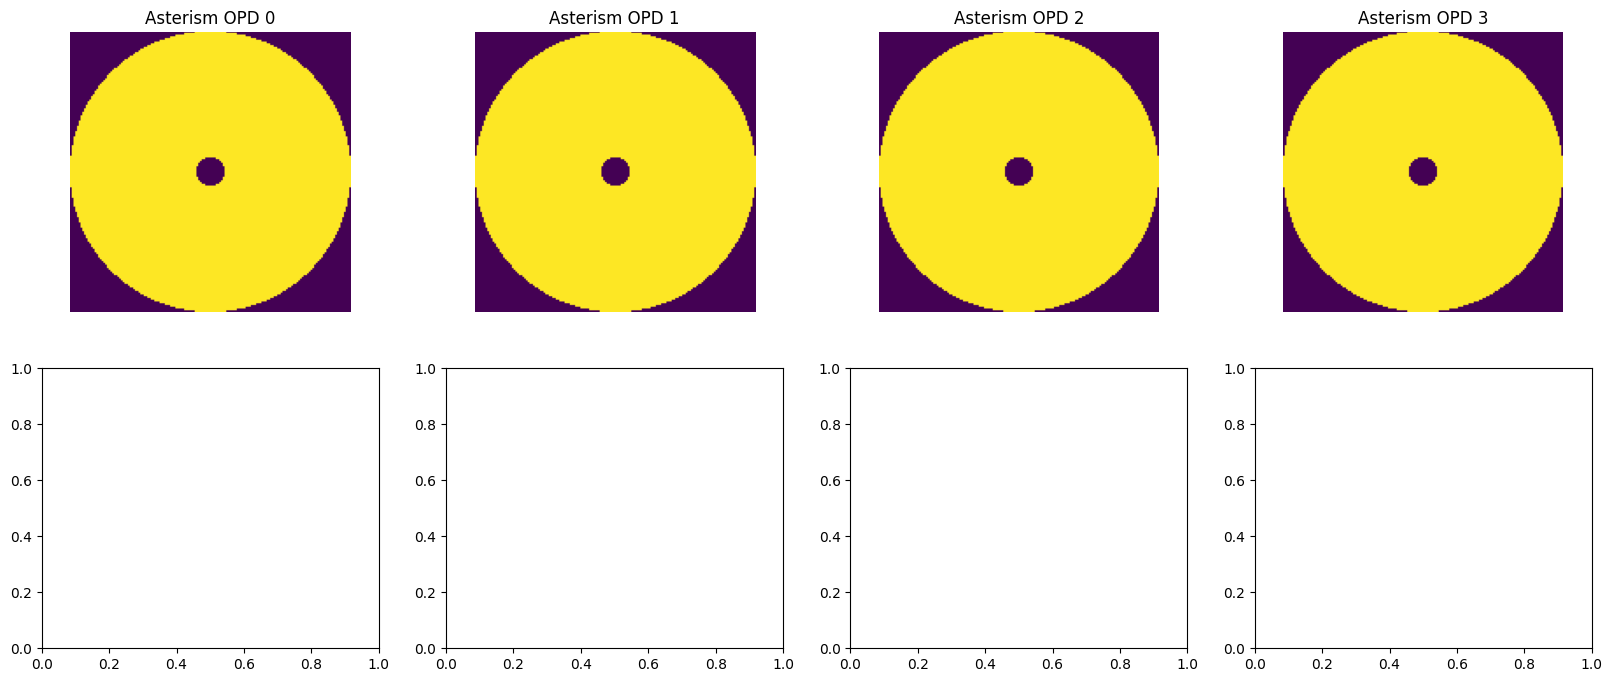

In [9]:
fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

if n_lgs == 1:
    axes = axes.reshape(2, 1)

for i in range(n_lgs):
    axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Asterism OPD {i}')


# for i in range(n_lgs):
#     axes[1, i].imshow(tel.OPD[i])
#     axes[1, i].axis('off')
#     axes[1, i].set_title(f'Telescope OPD {i}')

In [10]:
# tel.pupilReflectivity = tel.pupil.astype(float)
# zeroPaddingFactor = 6
# tel.computePSF(zeroPaddingFactor=zeroPaddingFactor)
#
# fig, axes = plt.subplots(1, 5, figsize=(20, 4))
#
# im = axes[0].imshow(np.log10(tel.PSF+1e-100), extent = [tel.xPSF_arcsec[0],tel.xPSF_arcsec[1],tel.xPSF_arcsec[0],tel.xPSF_arcsec[1]])# adding 1e-100 for display purpose
# im.set_clim([np.log10(tel.PSF).max()-4,np.log10(tel.PSF).max()])
# axes[0].set_xlabel('[Arcsec]')
# axes[0].set_ylabel('[Arcsec]')
# # axes[0].grid()
#
# size_pixel_arcsec = 206265*(tel.src.wavelength/tel.D)/zeroPaddingFactor
# N                 = 300
#
# for i in range(lgsAst.n_source):
#     normalized_PSF = tel.PSF_list[i][N:-N,N:-N]# crop to zoom on the center
#     fov = normalized_PSF.shape[0]*size_pixel_arcsec
#
#     im = axes[i+1].imshow(np.log10(normalized_PSF),extent=[-fov/2,fov/2,-fov/2,fov/2])
#     im.set_clim([-6,4])
#     axes[i+1].axis('off')
#     axes[i+1].set_xlabel('[Arcsec]')
#     axes[i+1].set_ylabel('[Arcsec]')
#     axes[i+1].set_title('NGS @ '+str(np.round(lgsAst.src[i].coordinates[0],1)) +';'+str(np.round(lgsAst.src[i].coordinates[1],1)))
#
# plt.show()

Creation of layer1/2 ...
10
10
10
10
-> Computing the initial phase screen...
initial phase screen : 0.012696981430053711 s
ZZt.. : 1.4341001510620117 s
ZXt.. : 0.28670477867126465 s
XXt.. : 0.1325368881225586 s
Done!
Creation of layer2/2 ...
10
10
10
10
-> Computing the initial phase screen...
initial phase screen : 0.02794933319091797 s
ZZt.. : 2.558670997619629 s
ZXt.. : 0.39921998977661133 s
XXt.. : 0.17220306396484375 s
Done!
Updating the Atmosphere covariance matrices...

------------------------ Atmosphere -------------------------
 Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
       |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
   1   |     0     |  5.0  |  0e+00   |    70    |  8.200   |
   2   |    45     | 20.0  |  1e+04   |    30    |  9.700   |
r0 @ 500 nm [m] |   0.16   
L0 [m]          |   50.0   
Tau0 [s]        |  0.0052  
V0 [m/s]        |   9.50   
Frequency [Hz]  |  1000.0  
-------------------------------------------------------------



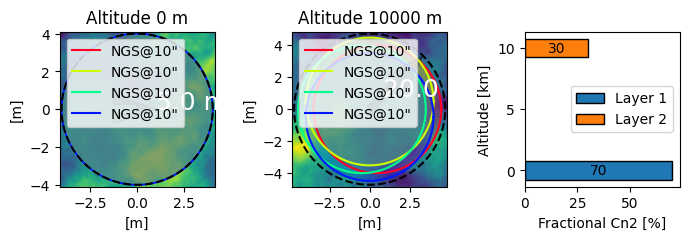

In [11]:
from OOPAO.Atmosphere import Atmosphere

r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm = Atmosphere(telescope      = tel,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)


atm.initializeAtmosphere(telescope=tel)
tel+atm
atm.display_atm_layers()


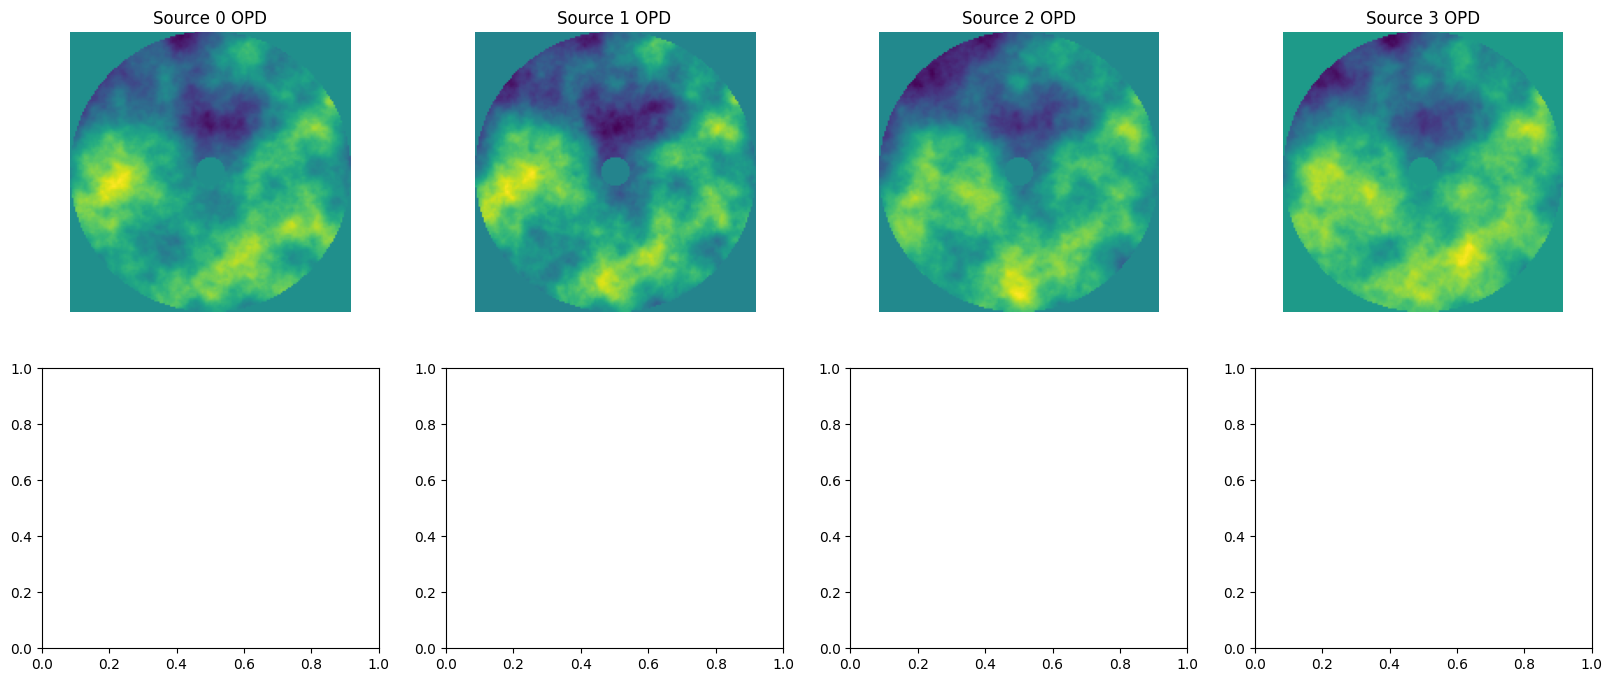

In [12]:
fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

if n_lgs == 1:
    axes = axes.reshape(2, 1)

for i in range(n_lgs):
    axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i} OPD')


# for i in range(n_lgs):
#     axes[1, i].imshow(tel.OPD[i])
#     axes[1, i].axis('off')
#     axes[1, i].set_title(f'Telescope OPD {i}')

In [13]:
# %%
print(f"lgsAst:")
lgsAst.print_optical_path()

print(f"\ntel:")
tel.print_optical_path()

lgsAst:
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope

tel:
No light propagated through the telescope


In [14]:
lgsAst**tel


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  5.9e-07   | 10.00  |  0.00   |   inf    |   0.00    |  9.0e+09  |
  2-NGS |  5.9e-07   | 10.00  |  90.00  |   inf    |   0.00    |  9.0e+09  |
  3-NGS |  5.9e-07   | 10.00  | 180.00  |   inf    |   0.00    |  9.0e+09  |
  4-NGS |  5.9e-07   | 10.00  | 270.00  |   inf    |   0.00    |  9.0e+09  |
----------------------------------------------------------------------------

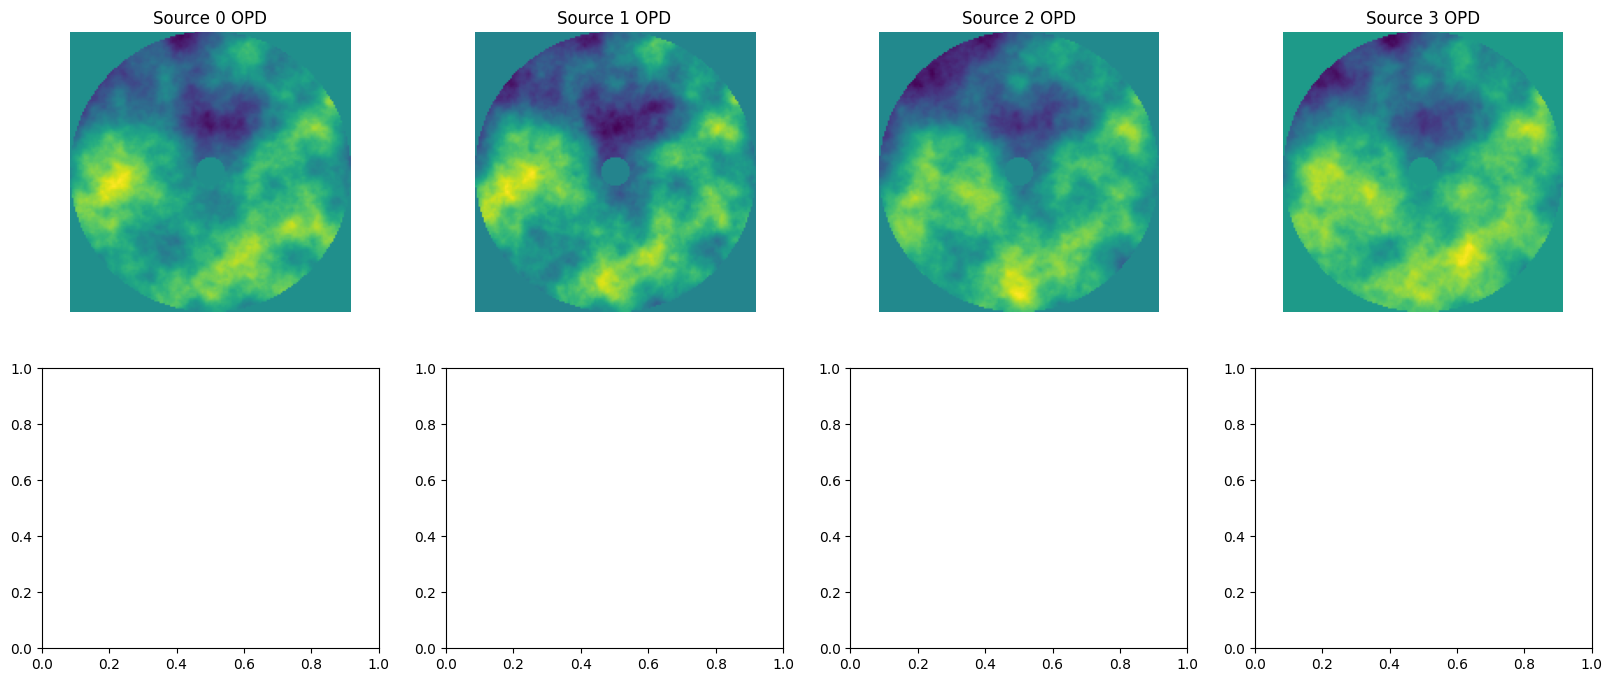

In [15]:
fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

if n_lgs == 1:
    axes = axes.reshape(2, 1)

for i in range(n_lgs):
    axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i} OPD')


# for i in range(n_lgs):
#     axes[1, i].imshow(tel.OPD[i])
#     axes[1, i].axis('off')
#     axes[1, i].set_title(f'Telescope OPD {i}')

In [16]:
print(f"lgsAst:")
lgsAst.print_optical_path()

print(f"\ntel:")
tel.print_optical_path()

lgsAst:
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope

tel:
No light propagated through the telescope


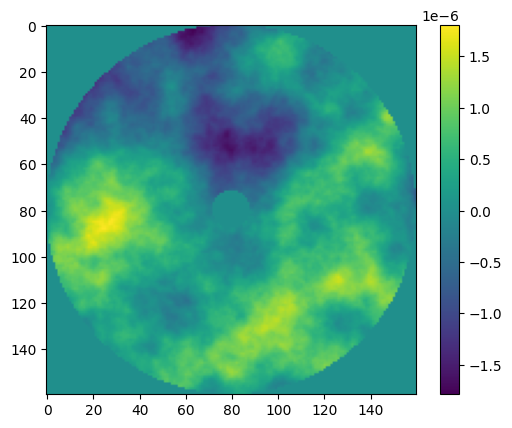

In [17]:
plt.imshow(lgsAst.OPD[0])
plt.colorbar()

In [18]:
from OOPAO.DeformableMirror import DeformableMirror
mechanical_coupling = 0.1458


dm_fried = DeformableMirror(telescope    = tel,
                            nSubap       = n_subaperture, # by default n_subaperture+1 actuators are considered (Fried Geometry)
                            mechCoupling = mechanical_coupling)

# dm_fried.coefs = np.random.rand(dm_fried.nValidAct)
dm_fried.coefs = 0


lgsAst**tel*dm_fried



No coordinates loaded.. taking the cartesian geometry as a default
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   356   
M4                       |  False  
Pitch [m]                |  0.40   
Mechnical coupling [%]   |   15    
== Misregistration ================
Rotation [°]             |  0.000  
Shift X [m]              |0.000e+00
Shift Y [m]              |0.000e+00
Anamorphosis angle [°]   |  0.000  
Tangential scaling [%]   |  0.000  
Radial scaling [%]       |  0.000  
-----------------------------------




--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  5.9e-07   | 10.00  |  0.00   |   inf    |   0.00    |  9.0e+09  |
  2-NGS |  5.9e-07   | 10.00  |  90.00  |   inf    |   0.00    |  9.0e+09  |
  3-NGS |  5.9e-07   | 10.00  | 180.00  |   inf    |   0.00    |  9.0e+09  |
  4-NGS |  5.9e-07   | 10.00  | 270.00  |   inf    |   0.00    |  9.0e+09  |
----------------------------------------------------------------------------

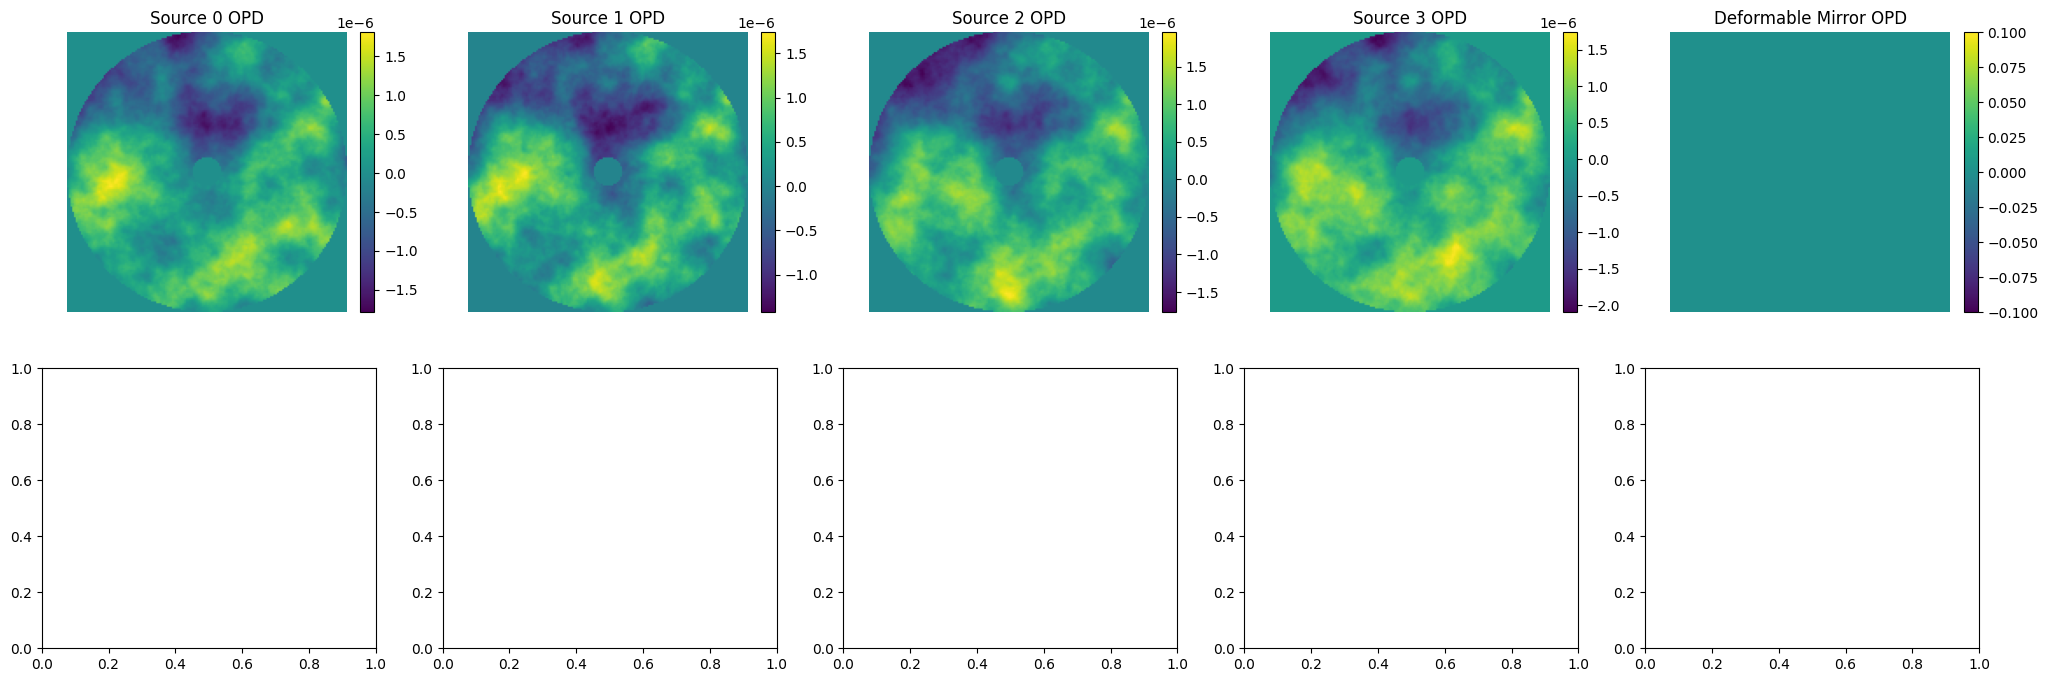

In [19]:
fig, axes = plt.subplots(2, n_lgs+1, figsize=((n_lgs+1)*5, 8))

for i in range(n_lgs):
    im = axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i} OPD')
    fig.colorbar(im, ax=axes[0, i], fraction=0.046, pad=0.04)

im = axes[0, n_lgs].imshow(dm_fried.OPD)
axes[0, n_lgs].axis('off')
axes[0, n_lgs].set_title(f'Deformable Mirror OPD')
fig.colorbar(im, ax=axes[0, n_lgs], fraction=0.046, pad=0.04)

#
# for i in range(n_lgs):
#     im = axes[1, i].imshow(tel.OPD[i])
#     axes[1, i].axis('off')
#     axes[1, i].set_title(f'Telescope OPD {i}')
#     fig.colorbar(im, ax=axes[1, i], fraction=0.046, pad=0.04)
#
# im = axes[1, n_lgs].imshow(dm_fried.OPD*tel.pupil)
# axes[1, n_lgs].axis('off')
# axes[1, n_lgs].set_title(f'Deformable Mirror OPD')
# fig.colorbar(im, ax=axes[1, n_lgs], fraction=0.046, pad=0.04)


No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   160   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done
OOPAO Warning: 
All Detector Noises are disables with the geometric WFS

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  1.21   
Pixel Scale [arcsec]     |  0.152  
Valid Subapertures       |   624   
Spot Sampling [pix]   

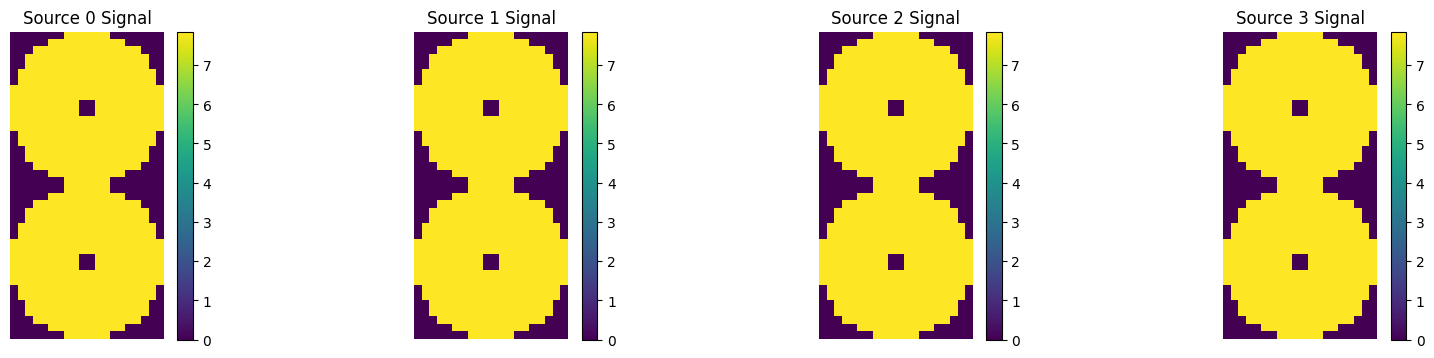

In [20]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs = ShackHartmann(telescope          = tel,
                      src                = lgsAst,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = True,
                      shannon_sampling   = True,
                      threshold_cog      = 0.1)




fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

if n_lgs == 1:
    # axes = axes.reshape(2, 1)
    axes = np.atleast_1d(axes)

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)




In [21]:
aoSys = tomoAO.Simulation.AOSystem(config_vars, tel=tel, lgsAst=lgsAst, atm=atm, dm=dm_fried, wfs=shwfs)



------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 1.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

No coordinates loaded.. taking the cartesian geometry as a default
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   356   
M4                       |  False  
Pitch [m]                |  0.40   
Mechn

In [22]:
if config_vars["usePythonReconstructor"]:
    print("Using Python Reconstructor\n")

    from tomoAO.Reconstruction.reconClassType import tomoReconstructor

    rec = tomoReconstructor(aoSys=aoSys, alpha=10, os=2)

    reconstructor = rec.Reconstructor[0]

    fitting_matrix = rec.fittingMatrix

    Cxx = rec.Cxx
    Cox = rec.Cox[0]
    Gamma = rec.Gamma

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/ReconstructorPython.mat',
            {'reconstructor': reconstructor})

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/FittingMatrixPython.mat',
            {'fitting_matrix': fitting_matrix})

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/CxxPython.mat',
        {'Cxx': Cxx})

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/CoxPython.mat',
        {'Cox': Cox})



    # reconstructor = np.array(rec.R_unfiltered)
    reconstructor = np.array(fitting_matrix @ reconstructor)
    
    reconstructor = reconstructor * lgsAst.src[0].wavelength

else:
    print("Using Matlab Reconstructor\n")
    reconstructor_data = loadmat('/home/joaomonteiro/Desktop/oopao_test_files/ReconstructorMatlab.mat')
    fitting_matrix_data = loadmat('/home/joaomonteiro/Desktop/oopao_test_files/fittingMatrixMatlab.mat')

    fittingMatrix = fitting_matrix_data['fittingMatrix']
    recstatsa = reconstructor_data['RecStatSA']

    reconstructor = fittingMatrix @ recstatsa

    # reconstructor = reconstructor*2

np.mean(reconstructor), reconstructor.shape

Using Python Reconstructor

Updating the Atmosphere covariance matrices...
GPU not available, using CPU
Building Gamma
Took 0.14009380340576172 seconds to build Gamma
Building the covariance matrices
Building Cox
Src1: 
------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

Src2: 
------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------

Src2: 
------------- Source --------------
Source       

(np.float64(2.851430507309272e-22), (356, 2496))

In [23]:
from OOPAO.calibration.compute_KL_modal_basis import compute_KL_basis
M2C_KL = compute_KL_basis(src=lgsAst.src[0],tel=tel,atm=atm,dm=dm_fried)

TIME ELAPSED: 2 sec. COMPLETED: 100 %
NMAX =  355
RMS opd error = [[1.71395560e-08 2.05824385e-08 2.05824385e-08]]
RMS Positions = [[7.00053659e-08 6.66058857e-07 6.66058857e-07]]
MAX Positions = [[7.64935592e-07 1.48894032e-06 1.48894032e-06]]
KL WITH DOUBLE DIAGONALISATION: COVARIANCE ERROR =  4.5153413100635244e-14


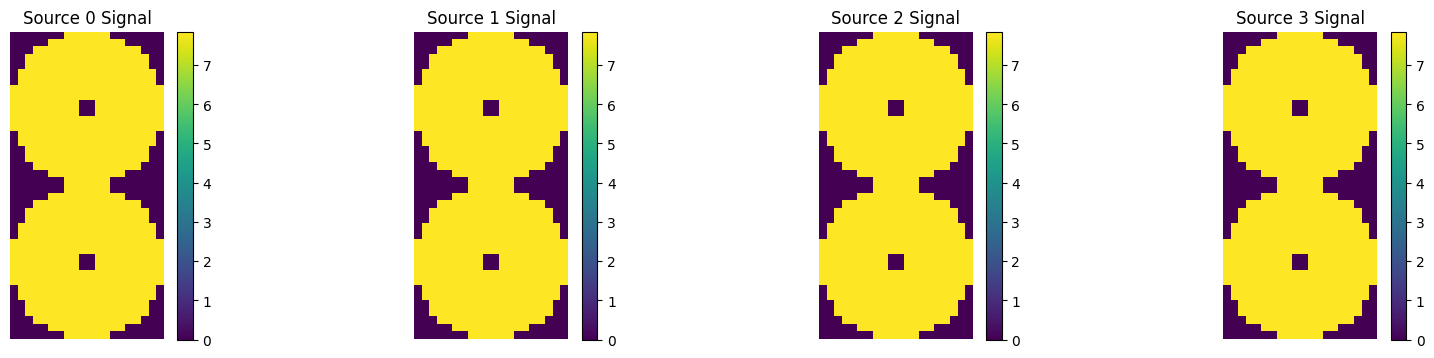

In [24]:
fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

if n_lgs == 1:
    # axes = axes.reshape(2, 1)
    axes = np.atleast_1d(axes)

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)


1e-09


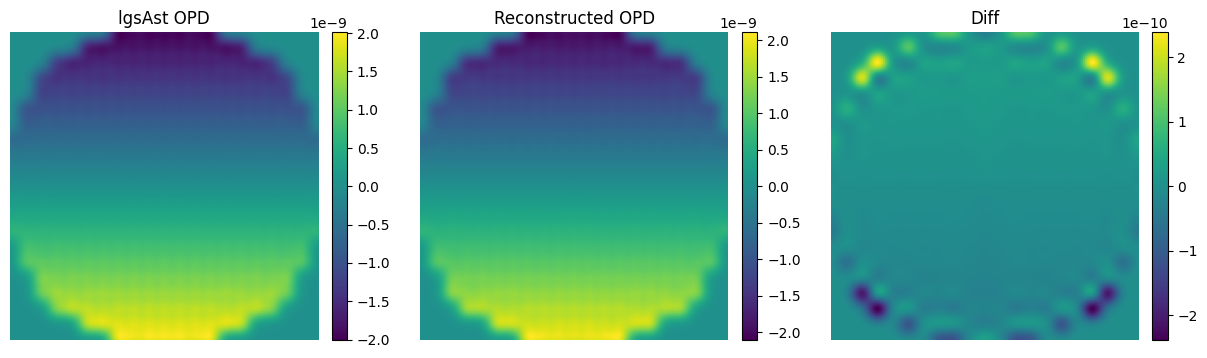

In [25]:
n = 0

# input_modes = np.random.randn(1)*1e-9
input_modes = 1e-9
print(input_modes)
dm_fried.coefs = M2C_KL[:,n] * input_modes

lgsAst**tel*dm_fried*shwfs



signal = [np.zeros(shwfs.signal[0].shape)]*n_lgs

for i in range(n_lgs):
    signal[i][:312] = shwfs.signal[i][312:]
    signal[i][312:] = shwfs.signal[i][:312]

signal = np.hstack(signal)
shwfs.signal = signal

# shwfs.signal = wfsG_mat @ lgsAst.OPD[0][np.where(tel.pupil>0)] * 2 * np.pi / lgsAst.wavelength 

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

dm_OPD = dm_fried.OPD
im = axes[0].imshow(dm_OPD)
axes[0].axis('off')
axes[0].set_title(f'lgsAst OPD')
fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

rec_OPD = (dm_fried.modes@reconstructor@shwfs.signal).reshape((tel.resolution, tel.resolution))

im = axes[1].imshow(rec_OPD)
axes[1].axis('off')
axes[1].set_title(f'Reconstructed OPD')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

im = axes[2].imshow(dm_fried.OPD-rec_OPD)
axes[2].axis('off')
axes[2].set_title(f'Diff')
fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)



In [26]:
reconstructor_ast = reconstructor.copy()
np.save('/home/joaomonteiro/Desktop/oopao_test_files/reconstructor_ast.npy', reconstructor_ast)


In [27]:
reconstructor_single = np.load('/home/joaomonteiro/Desktop/oopao_test_files/reconstructor_single.npy')

# reconstructor_single = np.tile(reconstructor_single, 4) / 4

print(reconstructor_single.shape)


(356, 624)


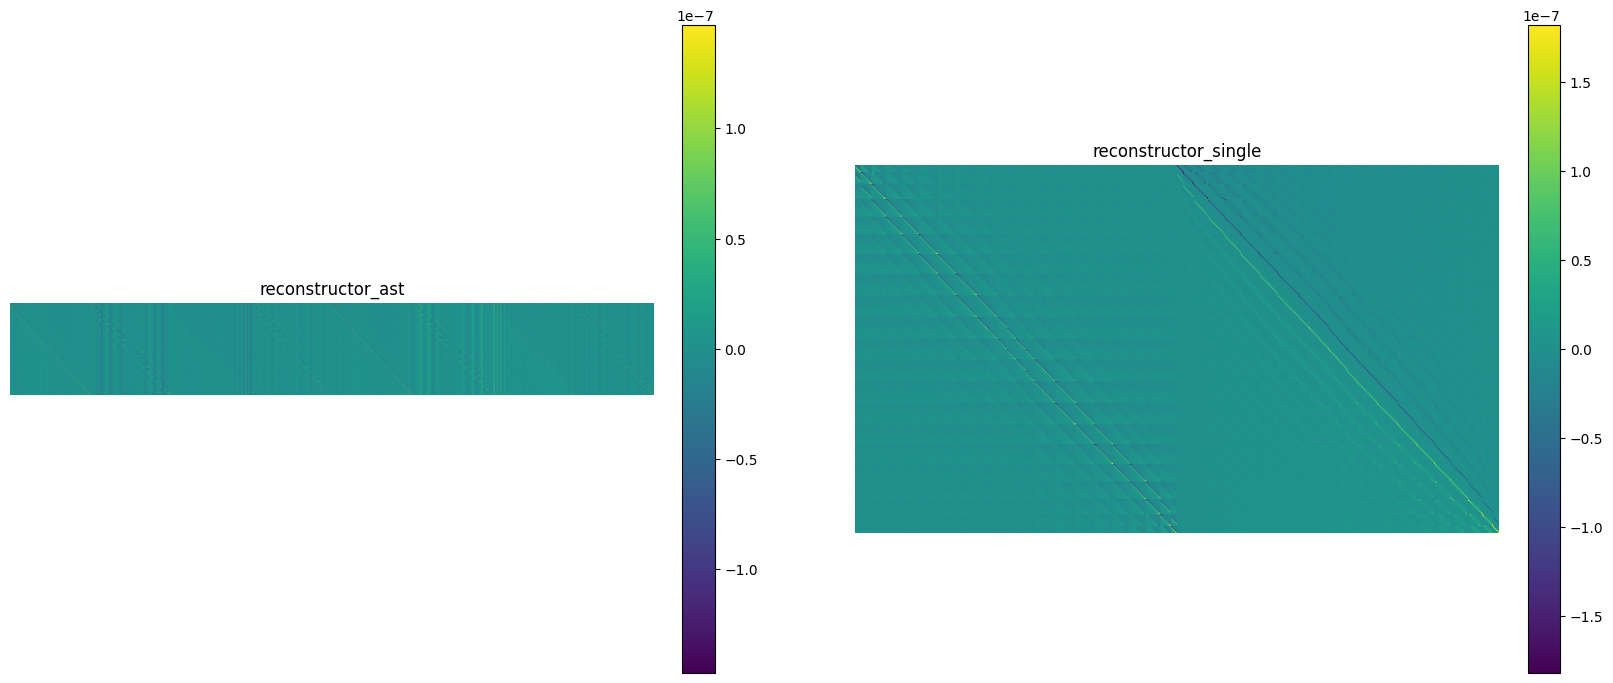

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

im = axes[0].imshow(reconstructor_ast)
axes[0].axis('off')
axes[0].set_title(f'reconstructor_ast')
fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

im = axes[1].imshow(reconstructor_single)
axes[1].axis('off')
axes[1].set_title(f'reconstructor_single')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)


-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   640   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

NGS(Na) ~~> telescope ~~> deformableMirror ~~> shackHartmann
NGS(Na) ~~> telescope ~~> deformableMirror ~~> shackHartmann
NGS(Na) ~~> telescope ~~> deformableMirror ~~> shackHartmann
NGS(Na) ~~> telescope ~~> deformableMirror ~~> shackHartmann


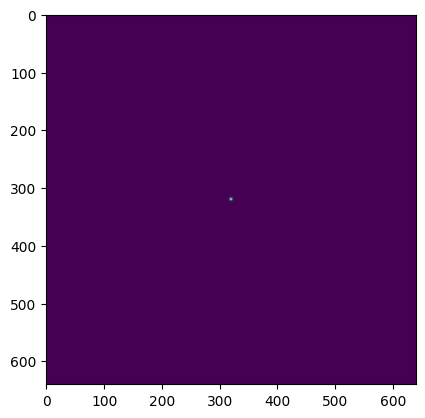

In [29]:
from OOPAO.Detector import Detector

src_cam = Detector(tel.resolution*4)
src_cam.psf_sampling = 4
src_cam.integrationTime = tel.samplingTime*1
# put the scientific target off-axis to simulate anisoplanetism (set to  [0,0] to remove anisoplanetism)
# src.coordinates = [0.4,0]

# atm.generateNewPhaseScreen(seed = 10)

# Define a scientific source:
SciSrc = Source(optBand='H', magnitude=0)

# tel.resetOPD()  # initialize Telescope
lgsAst.resetOPD()

dm = dm_fried
dm.coefs = 0      # initialize DM commands
lgsAst.print_optical_path()

atm.r0 = 0.16

tel+atm # combine tel and atm to enable turbulence

# tel.computePSF(4)

# initialize DM commands
# SciSrc**tel*dm*shwfs
SciSrc**tel*dm*src_cam

SciSrc.print_optical_path()

nLoop = 50

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal*n_lgs)*0

# loop parameters
# gainCL                  = config_vars["gainPol"]
gainCL                  = 0.4
display                 = True


# reconstructor = np.array(rec.R_unfiltered)
# reconstructor = reconstructor * lgsAst.src[0].wavelength / 2 / (tel.D/20) / 5
# reconstructor = reconstructor*4

tel-atm
SciSrc**tel*dm*src_cam
plt.imshow(src_cam.frame)
plt.show()
src_cam.reference_frame = src_cam.frame.copy()
tel+atm


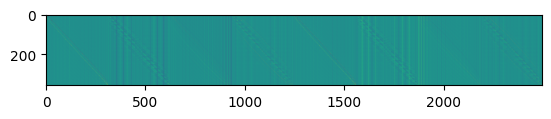

(2496, 79600)

In [30]:
# reconstructor_ast / reconstructor_single
rec_type = "ast"

if rec_type == "ast":
    reconstructor = reconstructor_ast
else:
    reconstructor = reconstructor_single

plt.imshow(reconstructor)
plt.show()

from scipy.linalg import block_diag

wfsG_mat_data = loadmat('/home/joaomonteiro/Desktop/oopao_test_files/WfsG.mat')

wfsG_mat_single = np.array(wfsG_mat_data['wfsG_mat'].todense())

if n_lgs == 1:
    wfsG_mat = wfsG_mat_single
else:
    wfsG_mat = block_diag(*[wfsG_mat_single]*n_lgs)

wfsG_mat.shape

In [31]:
wfsG_mat_single.shape

(624, 19900)

In [32]:
160*160

25600

In [33]:
np.count_nonzero(tel.pupil)

19900

In [34]:
#  @ dm.modes

SyntaxError: incomplete input (1819892911.py, line 1)

Using OOPAO wfs
Loop0/50 AO residual: 684.1791465249137 nm
Loop1/50 AO residual: 260.4388818824446 nm
Loop2/50 AO residual: 128.94697464656065 nm
Loop3/50 AO residual: 100.68978260464827 nm
Loop4/50 AO residual: 96.01160836622837 nm
Loop5/50 AO residual: 95.413925349693 nm
Loop6/50 AO residual: 95.56983707336587 nm
Loop7/50 AO residual: 95.05090676427979 nm
Loop8/50 AO residual: 94.68793824332163 nm
Loop9/50 AO residual: 94.93207016328124 nm
Loop10/50 AO residual: 94.79502202435914 nm
Loop11/50 AO residual: 94.1061169850859 nm
Loop12/50 AO residual: 94.09630625567648 nm
Loop13/50 AO residual: 94.62793013673017 nm
Loop14/50 AO residual: 94.57908947380453 nm
Loop15/50 AO residual: 94.76797460749606 nm
Loop16/50 AO residual: 95.78558541145982 nm
Loop17/50 AO residual: 96.66675252541523 nm
Loop18/50 AO residual: 96.84966956476168 nm
Loop19/50 AO residual: 97.31684179684716 nm
Loop20/50 AO residual: 97.9528556123694 nm
Loop21/50 AO residual: 97.71760331083544 nm
Loop22/50 AO residual: 97.30

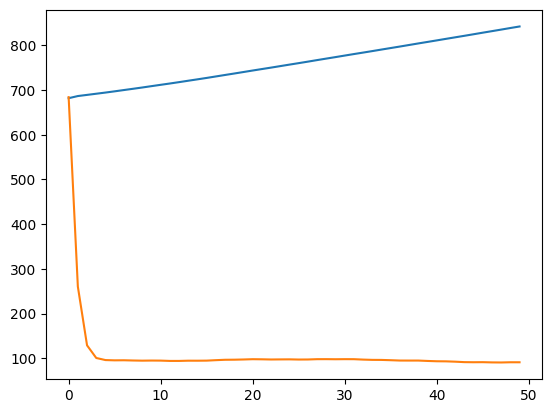

In [35]:
lgsAst**tel*dm*shwfs

if config_vars["wfs"] == 'oopao':
    print("Using OOPAO wfs")

elif config_vars["wfs"] == 'oomao':
    print("Using OOMAO wfs")

for i in range(nLoop):

    atm.update()

    total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9
    

    lgsAst**tel*shwfs


    SciSrc**tel*dm*src_cam
    

    if config_vars["wfs"] == 'oomao':
        if n_lgs == 1:
            wfsSignal = wfsG_mat @ lgsAst.OPD[0][np.where(tel.pupil>0)] * 2 * np.pi / lgsAst.wavelength 
        else:
            flatten_opds = np.hstack(np.array([lgsAst.OPD[i][np.where(tel.pupil==1)] for i in range(lgsAst.n_source)]))
            wfsSignal = wfsG_mat @ flatten_opds * 2 * np.pi / lgsAst.wavelength 
            
    elif config_vars["wfs"] == 'oopao':
        
        wfsSignal = shwfs.signal 

        signal_tmp = wfsSignal.copy()

        for k in range(n_lgs):
            

            wfsSignal[k][:312] = signal_tmp[k][312:]
            wfsSignal[k][312:] = signal_tmp[k][:312]

        wfsSignal=np.hstack(wfsSignal)

    lgsAst*dm

    dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@(wfsSignal))

    dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)
    # dm.coefs = dm.coefs - np.mean(dm.coefs)

    SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
    # residual[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9
    residual[i] = np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9
    print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')

plt.figure()
plt.plot(total)
plt.plot(residual)

In [ ]:
print(f"OOPAO SR: {SR[-1]}, SpaceODT SR: {np.max(src_cam.frame)/np.max(src_cam.reference_frame)}")

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

im = axes[0].imshow(dm_fried.OPD)
axes[0].axis('off')
axes[0].set_title(f'Deformable Mirror OPD')
fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

im = axes[1].imshow(SciSrc.OPD)
axes[1].axis('off')
axes[1].set_title(f'SciSrc OPD')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

im = axes[2].imshow(np.log10(np.abs(src_cam.frame)))
axes[2].axis('off')
axes[2].set_title(f'SciSrc Cam Fram')
fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

: 

In [ ]:
atm

: 

In [ ]:
lgsAst

: 

: 

: 

In [ ]:
aaaa

: 

In [ ]:
lgsAst**tel*shwfs

: 

In [ ]:
2496/4

: 

In [ ]:
# signal_oomao = wfsG_mat @ lgsAst.OPD[0][np.where(tel.pupil>0)] * 2 * np.pi / lgsAst.wavelength 

flatten_opds = np.hstack(np.array([lgsAst.OPD[i][np.where(tel.pupil==1)] for i in range(lgsAst.n_source)]))
signal_oomao = wfsG_mat @ flatten_opds * 2 * np.pi / lgsAst.wavelength 

# signal_oomao_2d = shwfs.valid_slopes_maps.copy().astype(np.float128)
 
# signal_oomao_2d[np.where(signal_oomao_2d>0)] = signal_oomao


: 

In [ ]:
lgsAst*shwfs

# signal_oopao = shwfs.signal[0] 

# signal_oopao_tmp = signal_oopao.copy()

# signal_oopao[:int(624/2)] = signal_oopao_tmp[int(624/2):]
# signal_oopao[int(624/2):] = signal_oopao_tmp[:int(624/2)]

# signal_oopao_2d = shwfs.valid_slopes_maps.copy().astype(np.float128)
 
# signal_oopao_2d[np.where(signal_oopao_2d>0)] = signal_oopao

signal_oopao = shwfs.signal 

signal_tmp = signal_oopao.copy()

for k in range(n_lgs):
    signal_oopao[k][:312] = signal_tmp[k][312:]
    signal_oopao[k][312:] = signal_tmp[k][:312]


signal_oopao_2d = np.array([shwfs.valid_slopes_maps.copy().astype(np.float128)]*4)
 
for k in range(n_lgs):
    signal_oopao_2d[k][np.where(signal_oopao_2d[k]>0)] = signal_oopao[k]

signal_oopao=np.hstack(signal_oopao)


: 

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].plot(signal_oopao)
axes[0].set_title(f'OOPAO Signal')

axes[1].plot(signal_oomao)
axes[1].set_title(f'OOMAO Signal')


axes[2].plot(signal_oomao-signal_oopao)
axes[2].set_title(f'Signal Diff')


: 

In [ ]:
print(f"OOPAO mean: {np.mean(signal_oopao)}, OOMAO mean: {np.mean(signal_oomao)}")

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

axes[0, 0].plot(signal_oopao)
axes[0, 0].set_title(f'OOPAO Signal')

axes[0, 1].plot(signal_oomao)
axes[0, 1].set_title(f'OOMAO Signal')


axes[0, 2].plot(signal_oomao-signal_oopao)
axes[0, 2].set_title(f'Signal Diff')




im = axes[1, 0].imshow(signal_oopao_2d)
axes[1, 0].axis('off')
axes[1, 0].set_title(f'OOPAO Signal 2D')
fig.colorbar(im, ax=axes[1, 0], fraction=0.046, pad=0.04)

im = axes[1, 1].imshow(signal_oomao_2d)
axes[1, 1].axis('off')
axes[1, 1].set_title(f'OOMAO Signal 2D')
fig.colorbar(im, ax=axes[1, 1], fraction=0.046, pad=0.04)

diff_2d = signal_oomao_2d-signal_oopao_2d

im = axes[1, 2].imshow(diff_2d)
axes[1, 2].axis('off')
axes[1, 2].set_title(f'Signal 2D Diff')
fig.colorbar(im, ax=axes[1, 2], fraction=0.046, pad=0.04)




: 

In [ ]:
np.min(signal_oomao), np.max(signal_oomao), np.min(signal_oopao), np.max(signal_oopao)

: 

: 

: 

In [ ]:
lgsAst**tel*shwfs

: 

In [ ]:
wfsSignal_oopao = shwfs.signal[0] 

signal_oopao_tmp = wfsSignal_oopao.copy()

wfsSignal_oopao[:int(624/2)] = signal_oopao_tmp[int(624/2):]
wfsSignal_oopao[int(624/2):] = signal_oopao_tmp[:int(624/2)]


# signal = np.zeros(shwfs.signal.shape[-1])
# signal[:312] = shwfs.signal[312:].copy()
# signal[312:] = shwfs.signal[:312].copy()
# wfsSignal_oopao=np.hstack(signal)


wfsSignal_oomao = wfsG_mat @ lgsAst.OPD[0][np.where(tel.pupil>0)] * 2 * np.pi / lgsAst.wavelength 


: 

In [ ]:
plt.plot(wfsSignal_oopao)


: 

In [ ]:
plt.plot(wfsSignal_oomao)

: 

In [ ]:
dm.coefs=0
lgsAst**tel#*dm


plt.imshow(lgsAst.OPD[0])
plt.colorbar()

: 

In [ ]:
lgsAst**tel*shwfs


# wfsSignal = wfsG_mat @ lgsAst.OPD[0][np.where(tel.pupil>0)] * 2 * np.pi / lgsAst.wavelength 

# flatten_opds = np.hstack(np.array([lgsAst.OPD[i][np.where(tel.pupil==1)] for i in range(lgsAst.n_source)]))
# wfsSignal = wfsG_mat @ flatten_opds * 2 * np.pi / lgsAst.wavelength 


# signal = [np.zeros(shwfs.signal[0].shape)]
# signal[:312] = shwfs.signal[312:]
# signal[312:] = shwfs.signal[:312]
# wfsSignal=np.hstack(signal)

wfsSignal = shwfs.signal.copy()

signal_tmp = wfsSignal.copy()

for k in range(n_lgs):
    wfsSignal[k][:312] = signal_tmp[k][312:]
    wfsSignal[k][312:] = signal_tmp[k][:312]

wfsSignal=np.hstack(wfsSignal)

SciSrc ** tel#* dm

plt.imshow(SciSrc.OPD)
plt.colorbar()
plt.show()

SciSrc * dm
# dm.coefs = dm.coefs - 0.4*reconstructor@wfsSignal

lgsAst*dm

dm.coefs = (1-0.4)*dm.coefs - 0.4 * (reconstructor@wfsSignal)

dm.coefs = dm.coefs - np.mean(dm.coefs)


plt.imshow(SciSrc.OPD)
plt.colorbar()
plt.show()
plt.imshow(lgsAst.OPD[0])
plt.colorbar()
plt.show()


: 

In [ ]:
np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9

: 

In [ ]:
lgsAst**tel*dm

: 

In [ ]:
lgsAst.wavelength


: 

In [ ]:
SciSrc.wavelength


: 

: 

In [ ]:
atm.windSpeed = [100]

: 

In [ ]:
from IPython.display import clear_output

: 

In [ ]:
lgsAst**tel

for n in range(100):

    if n%10 == 0:
        print(f"Iteration: {n}")
        fig, axes = plt.subplots(1, n_lgs, figsize=(20, 8))

        for i in range(n_lgs):
            im = axes[i].imshow(lgsAst.OPD[i])
            axes[i].axis('off')
            axes[i].set_title(f'Source {i} OPD')
            fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)


        clear_output()
        plt.show()
    atm.update()
    lgsAst**tel
    

: 

: 

: 